# <p align="center"><b style="color:#1f6feb;"> **🤖✨Comprehensive Text Preprocessing with Traditional Machine Learning Approaches for Sentiment Analysis🤖✨**</p>


### ‎‧₊**˚✿[My Name]✿˚** : **[Mohamed Reda Ramadan Khamis]**
### ‎‧₊**˚✿[My Phone Number]✿˚** : **[01554725661]**

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("lakshmi25npathi/imdb-dataset-of-50k-movie-reviews")

print("Path to dataset files:", path)

In [3]:
import pandas as pd
df = pd.read_csv(path +'/IMDB Dataset.csv')
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [4]:
df[['review']].head()

,review
0,One of the other reviewers has mentioned that ...
1,A wonderful little production. <br /><br />The...
2,I thought this was a wonderful way to spend ti...
3,Basically there's a family where a little boy ...
4,"Petter Mattei's ""Love in the Time of Money"" is..."


In [5]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [7]:
sample = df['review'][3]
print(sample)

Basically there's a family where a little boy (Jake) thinks there's a zombie in his closet & his parents are fighting all the time.<br /><br />This movie is slower than a soap opera... and suddenly, Jake decides to become Rambo and kill the zombie.<br /><br />OK, first of all when you're going to make a film you must Decide if its a thriller or a drama! As a drama the movie is watchable. Parents are divorcing & arguing like in real life. And then we have Jake with his closet which totally ruins all the film! I expected to see a BOOGEYMAN similar movie, and instead i watched a drama with some meaningless thriller spots.<br /><br />3 out of 10 just for the well playing parents & descent dialogs. As for the shots with Jake: just ignore them.


In [8]:
sample = df['review'][1]
print(sample)

A wonderful little production. <br /><br />The filming technique is very unassuming- very old-time-BBC fashion and gives a comforting, and sometimes discomforting, sense of realism to the entire piece. <br /><br />The actors are extremely well chosen- Michael Sheen not only "has got all the polari" but he has all the voices down pat too! You can truly see the seamless editing guided by the references to Williams' diary entries, not only is it well worth the watching but it is a terrificly written and performed piece. A masterful production about one of the great master's of comedy and his life. <br /><br />The realism really comes home with the little things: the fantasy of the guard which, rather than use the traditional 'dream' techniques remains solid then disappears. It plays on our knowledge and our senses, particularly with the scenes concerning Orton and Halliwell and the sets (particularly of their flat with Halliwell's murals decorating every surface) are terribly well done.


In [9]:
sample

'A wonderful little production. <br /><br />The filming technique is very unassuming- very old-time-BBC fashion and gives a comforting, and sometimes discomforting, sense of realism to the entire piece. <br /><br />The actors are extremely well chosen- Michael Sheen not only "has got all the polari" but he has all the voices down pat too! You can truly see the seamless editing guided by the references to Williams\' diary entries, not only is it well worth the watching but it is a terrificly written and performed piece. A masterful production about one of the great master\'s of comedy and his life. <br /><br />The realism really comes home with the little things: the fantasy of the guard which, rather than use the traditional \'dream\' techniques remains solid then disappears. It plays on our knowledge and our senses, particularly with the scenes concerning Orton and Halliwell and the sets (particularly of their flat with Halliwell\'s murals decorating every surface) are terribly well d

In [10]:
nltk.download('stopwords')
nltk.download('punkt_tab')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [11]:
stop_words = set(stopwords.words('english'))

In [12]:
len(stop_words)

198

In [13]:
stop_words

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 "he's",
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 "i'll",
 "i'm",
 "i've",
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [14]:
sample = sample.lower()
sample

'a wonderful little production. <br /><br />the filming technique is very unassuming- very old-time-bbc fashion and gives a comforting, and sometimes discomforting, sense of realism to the entire piece. <br /><br />the actors are extremely well chosen- michael sheen not only "has got all the polari" but he has all the voices down pat too! you can truly see the seamless editing guided by the references to williams\' diary entries, not only is it well worth the watching but it is a terrificly written and performed piece. a masterful production about one of the great master\'s of comedy and his life. <br /><br />the realism really comes home with the little things: the fantasy of the guard which, rather than use the traditional \'dream\' techniques remains solid then disappears. it plays on our knowledge and our senses, particularly with the scenes concerning orton and halliwell and the sets (particularly of their flat with halliwell\'s murals decorating every surface) are terribly well d

In [15]:
sample = re.sub(r'[^\w\s]', '', sample)
sample


'a wonderful little production br br the filming technique is very unassuming very oldtimebbc fashion and gives a comforting and sometimes discomforting sense of realism to the entire piece br br the actors are extremely well chosen michael sheen not only has got all the polari but he has all the voices down pat too you can truly see the seamless editing guided by the references to williams diary entries not only is it well worth the watching but it is a terrificly written and performed piece a masterful production about one of the great masters of comedy and his life br br the realism really comes home with the little things the fantasy of the guard which rather than use the traditional dream techniques remains solid then disappears it plays on our knowledge and our senses particularly with the scenes concerning orton and halliwell and the sets particularly of their flat with halliwells murals decorating every surface are terribly well done'

In [16]:
sample = re.sub(r'\d+', '', sample)
sample

'a wonderful little production br br the filming technique is very unassuming very oldtimebbc fashion and gives a comforting and sometimes discomforting sense of realism to the entire piece br br the actors are extremely well chosen michael sheen not only has got all the polari but he has all the voices down pat too you can truly see the seamless editing guided by the references to williams diary entries not only is it well worth the watching but it is a terrificly written and performed piece a masterful production about one of the great masters of comedy and his life br br the realism really comes home with the little things the fantasy of the guard which rather than use the traditional dream techniques remains solid then disappears it plays on our knowledge and our senses particularly with the scenes concerning orton and halliwell and the sets particularly of their flat with halliwells murals decorating every surface are terribly well done'

In [17]:
tokens = word_tokenize(sample)
tokens

['a',
 'wonderful',
 'little',
 'production',
 'br',
 'br',
 'the',
 'filming',
 'technique',
 'is',
 'very',
 'unassuming',
 'very',
 'oldtimebbc',
 'fashion',
 'and',
 'gives',
 'a',
 'comforting',
 'and',
 'sometimes',
 'discomforting',
 'sense',
 'of',
 'realism',
 'to',
 'the',
 'entire',
 'piece',
 'br',
 'br',
 'the',
 'actors',
 'are',
 'extremely',
 'well',
 'chosen',
 'michael',
 'sheen',
 'not',
 'only',
 'has',
 'got',
 'all',
 'the',
 'polari',
 'but',
 'he',
 'has',
 'all',
 'the',
 'voices',
 'down',
 'pat',
 'too',
 'you',
 'can',
 'truly',
 'see',
 'the',
 'seamless',
 'editing',
 'guided',
 'by',
 'the',
 'references',
 'to',
 'williams',
 'diary',
 'entries',
 'not',
 'only',
 'is',
 'it',
 'well',
 'worth',
 'the',
 'watching',
 'but',
 'it',
 'is',
 'a',
 'terrificly',
 'written',
 'and',
 'performed',
 'piece',
 'a',
 'masterful',
 'production',
 'about',
 'one',
 'of',
 'the',
 'great',
 'masters',
 'of',
 'comedy',
 'and',
 'his',
 'life',
 'br',
 'br',
 'the',


In [18]:
type(tokens)

list

In [19]:
tokens = [word for word in tokens if word not in stop_words]
tokens

['wonderful',
 'little',
 'production',
 'br',
 'br',
 'filming',
 'technique',
 'unassuming',
 'oldtimebbc',
 'fashion',
 'gives',
 'comforting',
 'sometimes',
 'discomforting',
 'sense',
 'realism',
 'entire',
 'piece',
 'br',
 'br',
 'actors',
 'extremely',
 'well',
 'chosen',
 'michael',
 'sheen',
 'got',
 'polari',
 'voices',
 'pat',
 'truly',
 'see',
 'seamless',
 'editing',
 'guided',
 'references',
 'williams',
 'diary',
 'entries',
 'well',
 'worth',
 'watching',
 'terrificly',
 'written',
 'performed',
 'piece',
 'masterful',
 'production',
 'one',
 'great',
 'masters',
 'comedy',
 'life',
 'br',
 'br',
 'realism',
 'really',
 'comes',
 'home',
 'little',
 'things',
 'fantasy',
 'guard',
 'rather',
 'use',
 'traditional',
 'dream',
 'techniques',
 'remains',
 'solid',
 'disappears',
 'plays',
 'knowledge',
 'senses',
 'particularly',
 'scenes',
 'concerning',
 'orton',
 'halliwell',
 'sets',
 'particularly',
 'flat',
 'halliwells',
 'murals',
 'decorating',
 'every',
 'surfac

In [20]:
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()
tokens = [stemmer.stem(word) for word in tokens]
tokens

['wonder',
 'littl',
 'product',
 'br',
 'br',
 'film',
 'techniqu',
 'unassum',
 'oldtimebbc',
 'fashion',
 'give',
 'comfort',
 'sometim',
 'discomfort',
 'sens',
 'realism',
 'entir',
 'piec',
 'br',
 'br',
 'actor',
 'extrem',
 'well',
 'chosen',
 'michael',
 'sheen',
 'got',
 'polari',
 'voic',
 'pat',
 'truli',
 'see',
 'seamless',
 'edit',
 'guid',
 'refer',
 'william',
 'diari',
 'entri',
 'well',
 'worth',
 'watch',
 'terrificli',
 'written',
 'perform',
 'piec',
 'master',
 'product',
 'one',
 'great',
 'master',
 'comedi',
 'life',
 'br',
 'br',
 'realism',
 'realli',
 'come',
 'home',
 'littl',
 'thing',
 'fantasi',
 'guard',
 'rather',
 'use',
 'tradit',
 'dream',
 'techniqu',
 'remain',
 'solid',
 'disappear',
 'play',
 'knowledg',
 'sens',
 'particularli',
 'scene',
 'concern',
 'orton',
 'halliwel',
 'set',
 'particularli',
 'flat',
 'halliwel',
 'mural',
 'decor',
 'everi',
 'surfac',
 'terribl',
 'well',
 'done']

In [21]:
sample

'a wonderful little production br br the filming technique is very unassuming very oldtimebbc fashion and gives a comforting and sometimes discomforting sense of realism to the entire piece br br the actors are extremely well chosen michael sheen not only has got all the polari but he has all the voices down pat too you can truly see the seamless editing guided by the references to williams diary entries not only is it well worth the watching but it is a terrificly written and performed piece a masterful production about one of the great masters of comedy and his life br br the realism really comes home with the little things the fantasy of the guard which rather than use the traditional dream techniques remains solid then disappears it plays on our knowledge and our senses particularly with the scenes concerning orton and halliwell and the sets particularly of their flat with halliwells murals decorating every surface are terribly well done'

In [22]:
print(tokens)

['wonder', 'littl', 'product', 'br', 'br', 'film', 'techniqu', 'unassum', 'oldtimebbc', 'fashion', 'give', 'comfort', 'sometim', 'discomfort', 'sens', 'realism', 'entir', 'piec', 'br', 'br', 'actor', 'extrem', 'well', 'chosen', 'michael', 'sheen', 'got', 'polari', 'voic', 'pat', 'truli', 'see', 'seamless', 'edit', 'guid', 'refer', 'william', 'diari', 'entri', 'well', 'worth', 'watch', 'terrificli', 'written', 'perform', 'piec', 'master', 'product', 'one', 'great', 'master', 'comedi', 'life', 'br', 'br', 'realism', 'realli', 'come', 'home', 'littl', 'thing', 'fantasi', 'guard', 'rather', 'use', 'tradit', 'dream', 'techniqu', 'remain', 'solid', 'disappear', 'play', 'knowledg', 'sens', 'particularli', 'scene', 'concern', 'orton', 'halliwel', 'set', 'particularli', 'flat', 'halliwel', 'mural', 'decor', 'everi', 'surfac', 'terribl', 'well', 'done']


In [23]:
sample = ' '.join(tokens)
sample

'wonder littl product br br film techniqu unassum oldtimebbc fashion give comfort sometim discomfort sens realism entir piec br br actor extrem well chosen michael sheen got polari voic pat truli see seamless edit guid refer william diari entri well worth watch terrificli written perform piec master product one great master comedi life br br realism realli come home littl thing fantasi guard rather use tradit dream techniqu remain solid disappear play knowledg sens particularli scene concern orton halliwel set particularli flat halliwel mural decor everi surfac terribl well done'

In [24]:
def clean_text(text):
  text = text.lower()
  text = re.sub(r'[^\w\s]', '', text)
  text = re.sub(r'\d+','', text)
  tokens = word_tokenize(text)
  tokens = [word for word in tokens if word not in stop_words]
  tokens = [stemmer.stem(word) for word in tokens]
  text = ' '.join(tokens)
  return text

In [25]:
df['clean_text'] = df['review'].apply(clean_text)

In [26]:
df[['review','clean_text']]

,review,clean_text
0,One of the other reviewers has mentioned that ...,one review mention watch oz episod youll hook ...
1,A wonderful little production. <br /><br />The...,wonder littl product br br film techniqu unass...
2,I thought this was a wonderful way to spend ti...,thought wonder way spend time hot summer weeke...
3,Basically there's a family where a little boy ...,basic there famili littl boy jake think there ...
4,"Petter Mattei's ""Love in the Time of Money"" is...",petter mattei love time money visual stun film...
...,...,...
49995,I thought this movie did a down right good job...,thought movi right good job wasnt creativ orig...
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",bad plot bad dialogu bad act idiot direct anno...
49997,I am a Catholic taught in parochial elementary...,cathol taught parochi elementari school nun ta...
49998,I'm going to have to disagree with the previou...,im go disagre previou comment side maltin one ...


In [29]:
words = []

In [30]:
df['clean_text'][0]
for i in range(df.shape[0]):
  words.extend(df['clean_text'][i].split())

In [33]:
len(set(words))

138101

In [34]:
tfidf_vectorizer = TfidfVectorizer(max_features=2500)
new_df = tfidf_vectorizer.fit_transform(df['clean_text'])

In [35]:
type(new_df)

scipy.sparse._csr.csr_matrix

In [36]:
new_df.shape

(50000, 2500)

In [37]:
new_df = pd.DataFrame(new_df.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

In [38]:
new_df.head()

,abandon,abil,abl,absolut,absurd,abus,academi,accent,accept,accid,...,york,youd,youll,young,younger,your,youth,youv,zero,zombi
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.075539,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.083721,0.0,0.000000,0.0,0.0,0.0,0.000000
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.000000,0.0,0.113181,0.0,0.0,0.0,0.157776
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.110008,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000


In [39]:
new_df['Target'] = df['sentiment']

In [40]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
new_df['Target'] = le.fit_transform(new_df['Target'])

In [41]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(new_df.drop('Target', axis=1), new_df['Target'], test_size=0.2, random_state=42)

In [43]:
(X_train.shape, y_train.shape),(X_test.shape,y_test.shape)

(((40000, 2500), (40000,)), ((10000, 2500), (10000,)))

In [44]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

RF = RandomForestClassifier()
RF.fit(X_train, y_train)
y_pred = RF.predict(X_test)

In [45]:
print(accuracy_score(y_test, y_pred))

0.845


In [46]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.85      0.85      4961
           1       0.85      0.84      0.84      5039

    accuracy                           0.84     10000
   macro avg       0.85      0.85      0.84     10000
weighted avg       0.85      0.84      0.84     10000



In [47]:
new_df.columns

Index(['abandon', 'abil', 'abl', 'absolut', 'absurd', 'abus', 'academi',
       'accent', 'accept', 'accid',
       ...
       'youd', 'youll', 'young', 'younger', 'your', 'youth', 'youv', 'zero',
       'zombi', 'Target'],
      dtype='object', length=2501)

In [48]:
new_df.drop(columns= 'Target',inplace=True)

In [50]:
new_df.columns

Index(['abandon', 'abil', 'abl', 'absolut', 'absurd', 'abus', 'academi',
       'accent', 'accept', 'accid',
       ...
       'york', 'youd', 'youll', 'young', 'younger', 'your', 'youth', 'youv',
       'zero', 'zombi'],
      dtype='object', length=2500)

In [51]:
from sklearn.cluster import KMeans

n_clusters = 2
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(new_df)

KMeans(n_clusters=2, random_state=42)

In [52]:
new_df.columns

Index(['abandon', 'abil', 'abl', 'absolut', 'absurd', 'abus', 'academi',
       'accent', 'accept', 'accid',
       ...
       'york', 'youd', 'youll', 'young', 'younger', 'your', 'youth', 'youv',
       'zero', 'zombi'],
      dtype='object', length=2500)

In [53]:
kmeans.labels_

array([0, 0, 0, ..., 0, 0, 1], dtype=int32)

In [54]:
new_df['cluster'] = kmeans.labels_

In [55]:
new_df['cluster'].value_counts()

,count
cluster,
0,34070
1,15930


In [56]:
df['cluster'] = kmeans.labels_

In [57]:
df

,review,sentiment,clean_text,cluster
0,One of the other reviewers has mentioned that ...,positive,one review mention watch oz episod youll hook ...,0
1,A wonderful little production. <br /><br />The...,positive,wonder littl product br br film techniqu unass...,0
2,I thought this was a wonderful way to spend ti...,positive,thought wonder way spend time hot summer weeke...,0
3,Basically there's a family where a little boy ...,negative,basic there famili littl boy jake think there ...,1
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,petter mattei love time money visual stun film...,0
...,...,...,...,...
49995,I thought this movie did a down right good job...,positive,thought movi right good job wasnt creativ orig...,1
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative,bad plot bad dialogu bad act idiot direct anno...,0
49997,I am a Catholic taught in parochial elementary...,negative,cathol taught parochi elementari school nun ta...,0
49998,I'm going to have to disagree with the previou...,negative,im go disagre previou comment side maltin one ...,0


In [58]:
new_df

,abandon,abil,abl,absolut,absurd,abus,academi,accent,accept,accid,...,youd,youll,young,younger,your,youth,youv,zero,zombi,cluster
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.075539,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.083721,0.0,0.000000,0.0,0.0,0.0,0.000000,0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.113181,0.0,0.0,0.0,0.157776,1
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,1
49996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0
49997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0
49998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0


In [59]:
df_0 = df[df['cluster'] == 0].reset_index(drop=True, inplace=False)
df_1 = df[df['cluster'] == 1].reset_index(drop=True, inplace=False)


In [ ]:
df_0['review'][5000]

In [ ]:
df_0['review'][9000]

In [60]:
feature_names = tfidf_vectorizer.get_feature_names_out()

In [61]:
len(feature_names)

2500

In [62]:
feature_names

array(['abandon', 'abil', 'abl', ..., 'youv', 'zero', 'zombi'],
      dtype=object)

In [63]:

def get_top_words(model, feature_names, terms=10):
    if model.cluster_centers_.shape[1] != len(feature_names):
        raise ValueError(f"Mismatch: cluster_centers_ has {model.cluster_centers_.shape[1]} features, "
                         f"but feature_names has {len(feature_names)} elements.")

    order_center = model.cluster_centers_.argsort()[:, ::-1]
    top_words = {}
    for i in range(model.n_clusters):
        top_words[i] = [feature_names[ind] for ind in order_center[i, :terms]]
    return top_words


In [64]:
feature_names = tfidf_vectorizer.get_feature_names_out()
top_k_words = get_top_words(kmeans, feature_names, 20)

In [65]:
top_k_words

{0: ['film',
  'br',
  'one',
  'like',
  'movi',
  'show',
  'charact',
  'stori',
  'time',
  'good',
  'get',
  'see',
  'make',
  'watch',
  'would',
  'even',
  'great',
  'love',
  'scene',
  'well'],
 1: ['movi',
  'br',
  'like',
  'watch',
  'one',
  'bad',
  'good',
  'realli',
  'see',
  'time',
  'make',
  'even',
  'would',
  'dont',
  'think',
  'get',
  'film',
  'act',
  'charact',
  'stori']}

In [ ]:
top_k_words

In [ ]:
top_k_words.items()

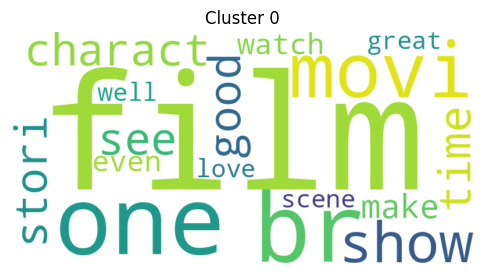

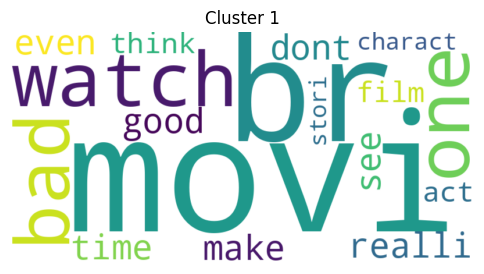

In [66]:
from wordcloud import WordCloud

for cluster, key in top_k_words.items():
  plt.figure(figsize=(6,6))
  wordcloud = WordCloud(width = 800, height = 400,background_color='white').generate(' '.join(key))
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.title(f'Cluster {cluster}')
  plt.axis('off')
  plt.show()

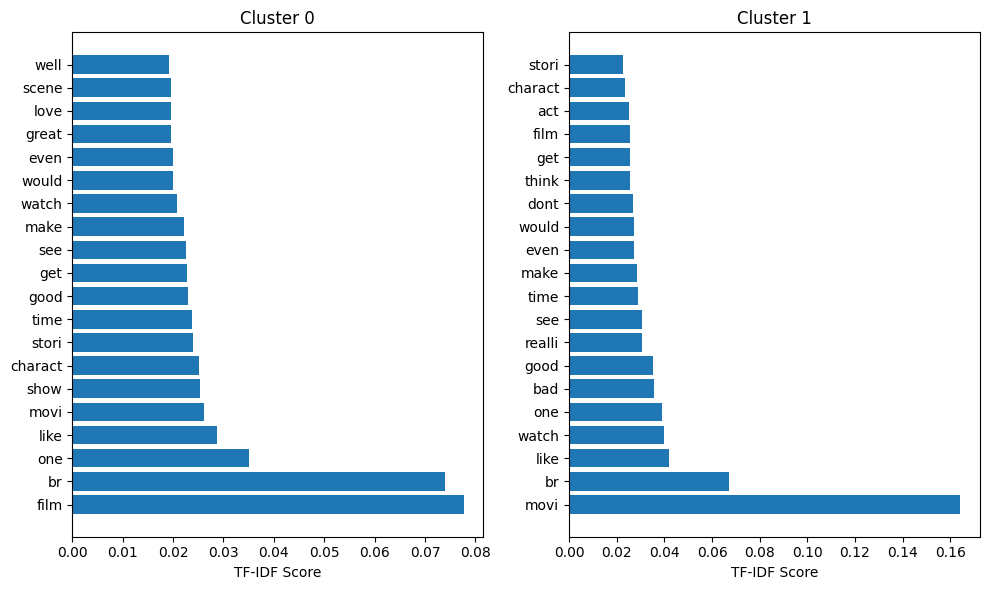

In [67]:
def plot_top_words_per_cluster(model, n_terms=20):
    order_centroids = model.cluster_centers_.argsort()[:, ::-1]
    plt.figure(figsize=(10, 6))

    for i in range(model.n_clusters):
        plt.subplot(1, model.n_clusters, i + 1)
        top_terms = [feature_names[ind] for ind in order_centroids[i, :n_terms]]
        top_scores = model.cluster_centers_[i, order_centroids[i, :n_terms]]

        plt.barh(top_terms, top_scores)
        plt.title(f'Cluster {i}')
        plt.xlabel('TF-IDF Score')

    plt.tight_layout()
    plt.show()

plot_top_words_per_cluster(kmeans)

In [ ]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

In [ ]:
tfidf_vectorizer = TfidfVectorizer(max_features=1000)
new_df = tfidf_vectorizer.fit_transform(df['clean_text'])

In [ ]:
new_df = pd.DataFrame(new_df.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

In [ ]:
new_df = new_df.sample(20000)

In [ ]:
new_df.shape

In [ ]:
model = AgglomerativeClustering(n_clusters=n_clusters)
model.fit(new_df)

In [ ]:
model.labels_

In [ ]:
new_df['cluster'] = model.labels_

In [ ]:
new_df['cluster'].value_counts()

In [68]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [69]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [70]:
sia = SentimentIntensityAnalyzer()

In [71]:
def get_sentiment_score(text):
  sentiment_score = sia.polarity_scores(text)
  return sentiment_score['compound']

In [72]:
df

,review,sentiment,clean_text,cluster
0,One of the other reviewers has mentioned that ...,positive,one review mention watch oz episod youll hook ...,0
1,A wonderful little production. <br /><br />The...,positive,wonder littl product br br film techniqu unass...,0
2,I thought this was a wonderful way to spend ti...,positive,thought wonder way spend time hot summer weeke...,0
3,Basically there's a family where a little boy ...,negative,basic there famili littl boy jake think there ...,1
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,petter mattei love time money visual stun film...,0
...,...,...,...,...
49995,I thought this movie did a down right good job...,positive,thought movi right good job wasnt creativ orig...,1
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative,bad plot bad dialogu bad act idiot direct anno...,0
49997,I am a Catholic taught in parochial elementary...,negative,cathol taught parochi elementari school nun ta...,0
49998,I'm going to have to disagree with the previou...,negative,im go disagre previou comment side maltin one ...,0


In [73]:
df['sentiment_score'] = df['review'].apply(get_sentiment_score)

In [74]:
df['sentiment_score'].value_counts()

,count
sentiment_score,
0.9943,75
0.9956,75
0.9977,71
0.9928,70
0.9932,70
...,...
-0.5104,1
-0.1300,1
0.4090,1


In [75]:
def get_sentiment_label(score):
  if score > 0:
    return 'Positive'
  elif score <= 0:
    return 'Negative'



In [76]:
df['label'] = df['sentiment_score'].apply(get_sentiment_label)

In [77]:
df['label'].value_counts()

,count
label,
Positive,32962
Negative,17038


In [79]:
Positive_df = df[df['label'] == 'Positive'][['review']].reset_index(drop=True)
Negative_df = df[df['label'] == 'Negative'][['review']].reset_index(drop=True)

In [84]:
Positive_df['review'][20]

'One of the most significant quotes from the entire film is pronounced halfway through by the protagonist, the mafia middle-man Titta Di Girolamo, a physically non-descript, middle-aged man originally from Salerno in Southern Italy. When we\'re introduced to him at the start of the film, he\'s been living a non-life in an elegant but sterile hotel in the Italian-speaking Canton of Switzerland for the last ten years, conducting a business we are only gradually introduced to. While this pivotal yet apparently unremarkable scene takes place employees of the the Swiss bank who normally count Di Girolamo\'s cash tell him that 10,000 dollars are missing from his usual suitcase full of tightly stacked banknotes. At the news, he quietly but icily threatens his coaxing bank manager of wanting to close down his account. Meanwhile he tells us, the spectators, that when you bluff, you have to bluff right through to the end without fear of being caught out or appearing ridiculous. He says: you can\

In [87]:
Negative_df['review'][30]

"The story is about a psychic woman, Tory, who returns to her hometown and begins reliving her traumatic childhood past (the death of her childhood friend and abusive father). Tory discovers that her friend was just the first in a string of murders that are still occurring. Can her psychic powers help solve the crimes and stop the continuing murders? <br /><br />You really don't need to find out because, Oh My God! This was so so so so bad! I know all the Nora Roberts fans will flock to this movie and give it tons of 10's. Then the rest of us will see an IMDb score of 6 and actually think this movie is worth watching. But do not be fooled. The ending was predictable, the acting TERRIBLE (don't even get me started about the southern accents *y'all*) and the story was trite. Just remember....you were warned!"